In [86]:
from sklearn.feature_selection import RFE
%config InlineBackend.figure_format='retina'
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
from boruta import BorutaPy

In [55]:
df = pd.read_csv('/Users/chenlianxu/Desktop/cleaned_data.csv')
X = df.iloc[:,3:40].drop(['rv1','rv2'],axis=1)
y = df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X,  y, random_state=0 )

# RFE 

In [58]:
rf = RandomForestRegressor(n_estimators = 100)
rfecv = RFECV(rf, step=1 ,cv=5,
              scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 18


In [62]:
rfecv.grid_scores_rmse[math.sqrt(rfecv.grid_scores_[i]) for i in range(len(rfecv.grid_scores_))]

array([107.76703379,  90.28177107,  73.11282809,  70.79418687,
        69.90661862,  69.59530496,  69.35838714,  68.64176205,
        68.56392685,  68.17632577,  68.1377906 ,  67.85145476,
        67.89018217,  67.9255901 ,  67.78108334,  67.75216849,
        68.00076565,  67.66258079,  68.00576018,  67.80463153,
        69.30068513,  69.7555916 ,  69.72725309,  69.66514349,
        69.95650323,  69.75102018,  69.89566242,  69.8869384 ,
        69.87130968,  69.95175221,  69.86625334,  69.84063827,
        69.84309979,  69.77835431,  69.91615541])

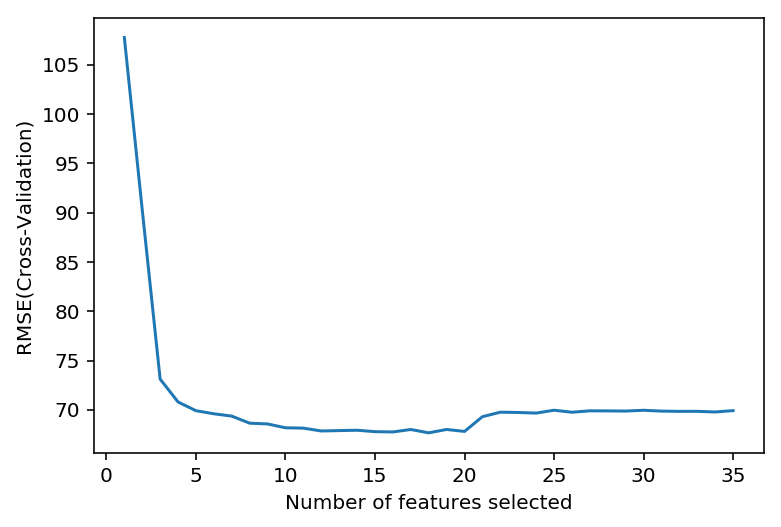

In [87]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("RMSE(Cross-Validation)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.show()

# boruta

In [73]:
X_bo = df.iloc[:,3:40]
y_bo = df['Appliances']
X_train_bo, X_test_bo, y_train_bo, y_test_bo = train_test_split(X_bo,  y_bo, random_state=0 )

In [74]:
X_train_bo_ =X_train_bo.values
y_train_bo_ = y_train_bo.values.ravel()
rf_boruta =  RandomForestRegressor(n_estimators = 100)
feat_selector = BorutaPy(rf_boruta, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X_train_bo_, y_train_bo_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	13
Rejected: 	14


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	13
Rejected: 	14


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	13
Rejected: 	14


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	13
Rejected: 	14


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	10
Rejected: 	16


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	10
Rejected: 	16


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	10
Rejected: 	16


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	10
Rejected: 	16


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	18
Tentative: 	2
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	18
Tentative: 	2
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	18
Tentative: 	2
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	18
Tentative: 	2
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	17
Iteration: 	29 / 100
Confirmed: 	20
Tentative: 	0
Rejected: 	17


BorutaPy finished running.

Iteration: 	30 / 100
Confirmed: 	20
Tentative: 	0
Rejected: 	17


/Users/chenlianxu/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=63, n_jobs=1,
           oob_score=False,
           random_state=<mtrand.RandomState object at 0x10a630cf0>,
           verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x10a630cf0>,
     two_step=True, verbose=2)

In [77]:
X_bo.columns[feat_selector.support_]

Index(['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'T9', 'RH_9', 'Press_mm_hg',
       'RH_out', 'Tdewpoint', 'NSM'],
      dtype='object')

In [78]:
feat_selector.ranking_

array([ 1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,
        1,  1,  4,  1,  1,  5,  7,  1,  8,  9,  1, 10, 11, 12, 18, 15, 13,
       14, 16, 17])

In [79]:
X_bo.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM', 'Dayoftheweek_Friday', 'Dayoftheweek_Monday',
       'Dayoftheweek_Saturday', 'Dayoftheweek_Sunday', 'Dayoftheweek_Thursday',
       'Dayoftheweek_Tuesday', 'Dayoftheweek_Wednesday',
       'Weekdaystatus_Weekday', 'Weekdaystatus_Weekend'],
      dtype='object')

In [82]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

Optimization Progress:  33%|███▎      | 40/120 [07:37<13:13,  9.92s/pipeline]  

Generation 1 - Current best internal CV score: -5155.070537565258


Optimization Progress:  50%|█████     | 60/120 [13:12<20:53, 20.89s/pipeline]

Generation 2 - Current best internal CV score: -5155.070537565258


Optimization Progress:  68%|██████▊   | 81/120 [25:33<43:15, 66.55s/pipeline]  

Generation 3 - Current best internal CV score: -5155.070537565258


Optimization Progress:  85%|████████▌ | 102/120 [47:12<25:07, 83.74s/pipeline]  

Generation 4 - Current best internal CV score: -4955.58726380178


Generation 5 - Current best internal CV score: -4955.58726380178

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=1, min_samples_split=7, n_estimators=100)
-5613.374074543417


True